# Least square approximations

by [Richard Tsai](https://www.researchgate.net/profile/Richard_Tsai3)


## A motivating example: linear regression

Data set: $(x_j,y_j), j=1,2,\cdots,n$

(LSQ) Find a line $g(x)=a_0+a_1x$ which best fit the data:

$$ \min_{a0, a1} \sum_{j=0}^n | a_0+a_1x_j -y_j |^2 $$

$E(a_0,a_1):=\sum_{j=0}^n | a_0+a_1x_j -y_j |^2$ is a quadratic function.

(LSQ) $\iff$ find the minimum of $E$ $\iff$ find the critical point of $E$

$$\partial E/\partial a_0 =0, \partial E/\partial a_1=0 $$

$$\iff \sum_{j=0}^n a_0+a_1x_j -y_j =0, \sum_{j=0}^n (a_0+a_1x_j -y_j)x_j =0$$

Notice that the two equations above depend linearly on the unknown $a_0$ and $a_1$.
You can write them in conveniently in the matrix-vector form.


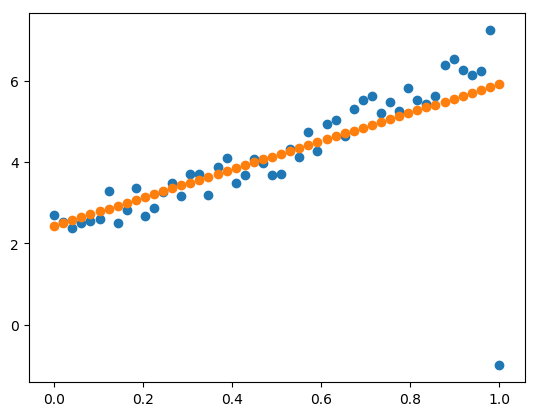

PyObject <matplotlib.collections.PathCollection object at 0x1390e2390>

In [27]:
f=x-> 2.5.*x.^2+2.*x+2+rand()

x=linspace(0,1,50)

y=f.(x)

#introduce here an outlier
y[end]=-1.0

using PyPlot

scatter(x,y)

# g(x)=a+bx, find a and b that best fits the data (x_j, y_j), j=1,2,...


#similar to the set up in the interpolation:

A=[ ones(length(x)) x]

B=A'*A
c=A'*y

a=B\c

scatter(x, A*a)

In [28]:
cond(A'A)

18.54752502692956

## General description of least square approximation problems

**The least square problem**: let $f(x):=\frac{1}{2}||Ax-b||_2^2$. We want to find where $f$ achieves the minimal value.

### Algebraic view
$$||Ax-b||_2^2 = (Ax-b,Ax-b)=(Ax-b)^T(Ax-b) = (x^T A^T -b^T)(Ax-b)$$
$$ = x^TA^TAx - x^TA^Tb - b^TAx+b^T b$$

(Note that $x^TA^Tb = (b^TAx)^T = b^TAx$ is a scalar.)

Critical point of $f$ satisfies:

$$ f^\prime(x) = A^TA x - A^T b = 0. $$

Solving the least square problem is equivalent to solving the **normal equation**

$$A^TAx=A^Tb.$$

** $A^TA$ is symmetric, positive definite **

### Geometrical view of the least square problem

* $y:=Ax$ is a vector in $col(A)$, the column space of $A$.


* $b=b^*+b^\perp,$ where $b^*$ in $col(A)$ and $b^\perp$ is not.
   
   
* $Ax=b^*$ has a unique solution, *if the columns of $A$ are linearly independent*.


* (LSQ) is equivalent to find $b^\perp$ that is the smallest 2-norm.


* The right $b^\perp$ is the one which is perpendicular to *all* vectors in $col(A)$.



**Learning objectives**:

* Where does $A$ come from? 
    * In particular, how do *orthogonal polynomials* come into play?
    
* Given $A$ and $m\times n$ matrix, the typical numerical methods to solve the least square problems:
    * (Cholesky), QR and SVD
    * Know how to use the "truncated" QR and SVD to improve the condition of the least square approximation.
    * Know which method is more suitable than the others
    * Know for to use the existing code to solve least square problems

* Know the geometry of least square problems.

## Orthogonal polynomials

Let $q(x)=c_1\phi_1(x)+c_2\phi_2(x)+\cdots+c_n\phi_n(x).$

We would like to use $q(x)$ to **approximate the given data**: $(x_1, y_1),(x_2,y_2),\cdots, (x_m,y_m), $ and **make prediction** at an arbitrarily chosen $x$.

* In general, $m\ge n$.

Least square approximation problem: 

**Find the coefficients $c_1,c_2,\cdots,c_n$ such that $q(x_j)$ *best fit* $y_j$, $j=1,2,\cdots,m$, in l2 norm:** 


* To fit the data, $(x_j,y_j)\in\mathbb{R}^2$, by a straight line, we simply choose $\phi_1(x)=1$ and $\phi_2(x)=x$.

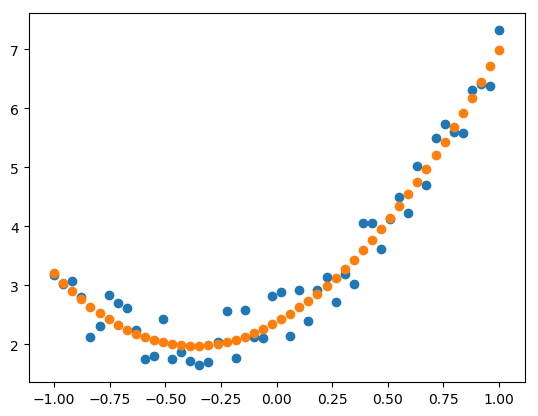

PyObject <matplotlib.collections.PathCollection object at 0x138c62910>

In [10]:
f=x-> 2.5.*x.^2+2.*x+2+rand()

x=linspace(-1,1,50)

n=length(x)
x_=collect(x)

A_=[ones(n) x_ x_.^2 x_.^3]

#Legendre polynomial as basis functions
A__=[ones(n) x_ 0.5*(3.*x_.^2-1.0) 0.5.*(5x_.^3-3.0x_)]

y_=f.(x_)
#y_[n-1]=1.2
#y_[n-2]=5.0

B=A_'*A_
c=A_'*y_

a=B\c

scatter(x_,y_)
scatter(x_, A_*a)

In [30]:
println("(x^2,x^3)=", dot(x.^2, x.^3))
println("(L2,L3)=", dot(0.5*(3.*x_.^2-1.0),0.5.*(5x_.^3-3.0x_)))


println("condition number using 1, x, x^2 x^3:             ", cond(A_'A_))
println("condition number using Legendre polynomials:      ", cond(A__'A__))

#if one uses QR factorization, one only needs to invert R
Q,R=qr(A_)
println("\ncondition number for R, after computing qr(A_ ):  ",cond(R))
Q,R=qr(A__)
println("condition number for R, after computing qr(A__):  ",cond(R))


(x^2,x^3)=8.675169359705565
(L2,L3)=3.3306690738754696e-16
condition number using 1, x, x^2 x^3:             62.23091391105069
condition number using Legendre polynomials:      6.281152904350122

condition number for R, after computing qr(A_ ):  7.888657294562296
condition number for R, after computing qr(A__):  2.506222836132119


## QR factorization

QR factorization finds orthonormal basis of the subspace spanned **successively** by columns of $A$.

$A=QR$ where the columns of $Q$ are orthonormal and $R$ is an upper triangular matrix.

Let $A$ be an $m\times n$ matrix and $m>n$.
There are two versions of QR factorization: the full QR or the "thin" QR.

* In this note, we shall assume the "thin" QR as default: $Q$ is an $m\times n$ orthonormal matrix, and $R$ is $n\times n$.

Let $a_j$ be the jth column of $A$ and $q_j$ be the jth column of $Q$.

**Very important property of $Q$**: span$\{a_1,\cdots,a_j\}=$span$\{q_1,\cdots,q_j\}, j=1,2,\cdots,n$


* Full QR factorization can be thought of  a QR factorization of $A_f$ which is an $m\times m$ matrix, by padding $A$ with the addition of $m-n$ zero column vectors.
    * $Q$ is a $m\times m$ orthonormal matrix


In [1]:
A=rand(4,2)
display(A)

Q,R=qr(A)
display(Q)
display(R)

Q'Q

4×2 Array{Float64,2}:
 0.710726  0.260087
 0.659208  0.095578
 0.249536  0.401383
 0.445615  0.636766

4×2 Array{Float64,2}:
 -0.648658  -0.204324
 -0.60164   -0.450742
 -0.227744   0.484354
 -0.4067     0.721446

2×2 Array{Float64,2}:
 -1.09569  -0.576596
  0.0       0.557581

2×2 Array{Float64,2}:
 1.0          1.14438e-16
 1.14438e-16  1.0        

In [2]:
Qf, Rf= qr(A, thin=false)
display(Qf)
display(Rf)

Qf'Qf

4×4 Array{Float64,2}:
 -0.648658  -0.204324  -0.375731  -0.62954 
 -0.60164   -0.450742   0.375465   0.542114
 -0.227744   0.484354   0.757179  -0.374451
 -0.4067     0.721446  -0.380174   0.411799

2×2 Array{Float64,2}:
 -1.09569  -0.576596
  0.0       0.557581

4×4 Array{Float64,2}:
 1.0          1.14438e-16   1.03458e-16   1.90986e-16
 1.14438e-16  1.0           8.2835e-17    1.39189e-16
 1.03458e-16  8.2835e-17    1.0          -2.94983e-17
 1.90986e-16  1.39189e-16  -2.94983e-17   1.0        

### Use QR factorization to solve the least square problems:

$A=QR$ 

1. Project the data vector: $y: = Q^\top b$
2. Solve $Rx=y$.

Let's see if this solution satisfies the normal equation.

Since $Q$ is an orthonormal matrix (it's columns are orthonormal), so 
* $Q^\top Q=I$.
* $QQ^\top$ is a **projection matrix**: $z=QQ^\top b$ is a vector **in the column space of $Q$**, which is the same as the column space of $A$.
    * So $z=QQ^\top b$ is in the range of $A$; i.e. $Ax=z$ has a unique solution if the columns of $A$ are linearly independent.

We can prove our QR algorithm either by geometrical arguments or algebraically.

#### Algebraic view

$$A^\top=R^\top Q^\top,$$

$$ Rx=Q^\top b \implies QRx=QQ^\top b \implies (R^\top Q^\top) QR x = (R^\top Q^\top) QQ^\top b$$

$$ Q^\top Q=I \implies A^\top A x = R^\top Q^\top b=A^\top b$$

#### Geometric view

$Q^\top b$ is the orthogonal projection of $b$ to $col(A)$, represented in the "new" coordiante systems defined by the columns of $Q$.

## Pivoted QR factorization and truncation and applications

QR-factorization can be used to solve both **underdetermined**, 
**square** and **overdetermined**
linear systems of equations. 

It can also be used to compute a numerically 
stable solution of an **ill-conditioned** system.


With pivoted QR-factorization a matrix can be factorized into
$$AP=QR$$
where $P$ is a permutation matrix, making the diagonal elements $r_{i,i}$ in 
the uppertriangular matrix $R$ be ordered in decending order, i.e.
$\vert r_{i,i} \vert \le \vert r_{i-1,i-1} \vert $. 

$Q$ is orthonormal, i.e. $Q^\top Q = I$. Assume the matrix $A$ is $n\times n$. 

In Julia, $Q,R,$ and $P$ can be computed as follows:

```
F=qrfact(A, Val{true}) #Val{true} tells Julia to compute the pivoted full QR factorizaton
Q=F[:Q]
R=F[:R]
P=F[:P]
```

The solution of a linear system of equations $A{\bf x}={\bf b}$ is obtained from 
$$R{\bf y}=Q^T{\bf b}, \quad and \quad {\bf x}=P{\bf y}$$
If the matrix $A$ is ill-conditioned $R$ can be written on block form
$$R=\pmatrix{R_{11}&R_{12}\cr
               0   &E\cr}$$
where 
* $R_{11}$ is an uppertriangular matrices of dimension $r\times r$, 
* $E$ is an uppertriangular matrices of dimension $n-r\times n-r$, and **the elements of 
$E$ are very small**. 
    - The smaller the elements of $E$ are the more 
ill-conditioned is the matrix $A$. 
    - If the elements of $E$ are exactly zero the matrix $A$ is rank-deficient with $rank(A)=r$.
        
By setting small but nonzero elements in $E$ to zero we regard the matrix $A$ 
as rank-deficient even if it isn't that mathematically. Then we cannot 
find a unique solution. But we can, instead, **find a  least square solution with the smallest 2-norm** (why?) to
$\hat A \hat{\bf x} = {\bf b}$, where
$$\hat A = Q \pmatrix{R_{11}&R_{12}\cr
                         0  & 0 \cr} P^T$$
according to the following algorithm:

1. Compute the vectors $\hat {\bf d}$ and ${\bf d}_E$ from
$$Q^T {\bf b} =\pmatrix{\hat {\bf d}\cr
                         {\bf d}_E \cr}$$
2. Solve the system 
$$R_{11}\hat {\bf y}=\hat {\bf d}$$
3. Finally compute
$$\hat {\bf x}=P\pmatrix{\hat {\bf y}\cr
                            0\cr}$$



The goal of this exercise is to illustrate the following relations:

1. the sensitivity of the solution $\hat {\bf x}$  from the experimentally computed condition number of $R_{11}$ (see below) as a
function of $r$
2. the condition number of $R_{11}$ computed with Julia's function 'cond( )' as a function of $r$
3. the norm of the matrix $E$ as a function of $r$
4. the norm of the residual ${\bf res}=A \hat {\bf x} - {\bf b}$ as a 
function of $r$

What is important in practice is to find the rank $r$ for
which both the residual ${\bf res}$ and the sensitivity of disturbancies in
**b** are "small". Often this is a compromize; the norm of the residual
increases while the sensitivity (condition number) decreases as the rank $r$
decreases.  

In the following box, a function named 'gen_illposed_system()' is defined. 
It creates an ill-conditioned system $A{\bf x}={\bf b}$.

1. Compute a system of size $n=18$, i.e. $A$ is $18\times 18$ and ${\bf b}$ is
$18\times 1$. 
2. Estimate the condition number $\kappa (A)$ experimentally
from the relation
$${\Vert \Delta {\bf x} \Vert_2 \over \Vert {\bf x} \Vert_2} = 
\kappa (A) {\Vert \Delta b \Vert_2 \over \Vert {\bf  b} \Vert_2}$$
by disturbing ${\bf b}$ with some small perturbances $\Delta {\bf b}$ and see
how ${\bf x}$ is changed, $\Delta {\bf x}$. Compare your result with 
Julia's function `cond()`.
3. Write a program showing a table of the following quantities 
as functions of the rank $r=8,7,6,5$: $\tt norm(E)$, $\tt cond(R_{11})$,
the experimentally computed condition number of $R_{11}$, $\tt norm(x)$,
and $\tt norm(res)$. Express your results in a way that describes the 
behaviour of the relations mentioned above as functions of the rank $r$.



## Singular value decomposition (SVD)
Let $A$ be an $m\times n$ matrix. 

* Assuming that $m\geq n$.

The reduced singular value decomposition of $A$ is denoted as
$$A = U \Sigma V^\top.$$

$\Sigma$ is and $n\times n$ diagonal matrix, containing the 
singular values of $A$.

$$\Sigma = \begin{pmatrix} \sigma_1 \cr & \sigma_2 \cr &&\ddots \cr &&& \sigma_n \cr \end{pmatrix},$$
where $\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_n \geq 0$.

$U \in \mathbb R^{m\times n}$ matrix with orthonormal columns.

$V \in \mathbb R^{n\times n}$ matrix with orthonormal columns: $V^\top V=I=VV^\top$. *$V$ is unitary.*

* Assuming that $m<n$

$$\Sigma = \begin{pmatrix} \sigma_1 \cr & \sigma_2 \cr &&\ddots \cr &&& \sigma_n \cr &&& 0 \cr &&&\vdots \cr &&&0\end{pmatrix},$$

where $\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_n \geq 0$.


$U \in \mathbb R^{m\times m}$ matrix with orthonormal columns: $U^\top U=I=UU^\top$.

$V \in \mathbb R^{m\times n}$ matrix with orthonormal columns. *$U$ is unitary.*




In [14]:
 A = [1. 0. 0. 0. 2.; 
      0. 0. 3. 0. 0.; 
      0. 0. 0. 0. 0.; 
      0. 2. 0. 0. 0.]

println("Verify that USV' = A:")
U, S, V = svd(A)

U*diagm(S)*V'

Verify that USV' = A:


4×5 Array{Float64,2}:
 1.0  0.0  0.0  0.0  2.0
 0.0  0.0  3.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  2.0  0.0  0.0  0.0

### Using SVD to solve the least square problem

$$\min_x ||Ax-b||_2^2$$

* SVD is particularly useful when $A$ is rank-difficient.
* If the number of linearly independent columns of $A$ is smaller than the number of rows, $A$ is rank-difficient. In a least square problem, A has more rows than columns, and is a typical rank-difficient case.

#### Algorithm: 

1. Compute the SVD of $A$:   `U,S,V=svd(A)`
2. Make a decision on rank: choose $r$ so that $\sigma_r>tol>0$.
3. Truncate U,S,V accordingly: 
```
Vr=V[:,1:r]
Sr=S[1:r,1:r]
Ur=U[:,1:r]
```
4. `xr=Vr*(Sr\Ur'b)`
5. General solution is: `x=xr+V[:,r+1:n]*rand(m-r)`, where `m=size(A,1)`

